# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# bash
# Install pystan with pip before using pip to install prophet
!pip install pystan==2.19.1.1
!pip install prophet

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet

In [ ]:
data_array = np.load('/content/gdrive/MyDrive/Colab Notebooks/Datasets/traffic.npy')
data = pd.DataFrame(data_array)

In [ ]:
data.head(5)

0         1         2      ...     10557     10558     10559
0  0.020933  0.019333  0.020200  ...  0.027783  0.019467  0.014167
1  0.005917  0.004367  0.004150  ...  0.025967  0.020467  0.013117
2  0.013850  0.009217  0.008717  ...  0.048617  0.042550  0.030283
3  0.012733  0.008817  0.006483  ...  0.029100  0.025050  0.013417
4  0.007850  0.006333  0.005200  ...  0.015567  0.013600  0.008950

[5 rows x 10560 columns]

In [ ]:
# lấy time series của đường đầu tiên
data_oneroad = pd.DataFrame(data_array[0])

In [ ]:
# tạo cột thời gian cho time series
# '2015-02-24': thời gian bắt đầu
# period: số lần lặp lại vói đơn vị freq
ds = pd.date_range('2015-02-24',  periods=10560, freq='H')

In [ ]:
#tạo dataframe của đương đầu tiên với thời gian đã tạo
dataframe_first_road = pd.DataFrame({'ds': ds, 'y': data_array[0]})

In [ ]:
dataframe_first_road.head(5)

ds         y
0 2015-02-24 00:00:00  0.020933
1 2015-02-24 01:00:00  0.019333
2 2015-02-24 02:00:00  0.020200
3 2015-02-24 03:00:00  0.022450
4 2015-02-24 04:00:00  0.029283

# Prophet- forecasting for first road

In [ ]:
# tạo model
m = Prophet()
m.fit(dataframe_first_road)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# thêm vào cột ds những khoảng thời gian muốn dự báo
future = m.make_future_dataframe(periods=168, freq='H')
future.tail()

ds
10723 2016-05-15 19:00:00
10724 2016-05-15 20:00:00
10725 2016-05-15 21:00:00
10726 2016-05-15 22:00:00
10727 2016-05-15 23:00:00

In [ ]:
# dự đoán dataframe của đường đầu tiên
forecast_first_road = m.predict(future)
forecast_first_road[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds      yhat  yhat_lower  yhat_upper
10723 2016-05-15 19:00:00  0.044253    0.017631    0.070698
10724 2016-05-15 20:00:00  0.034698    0.009716    0.061617
10725 2016-05-15 21:00:00  0.026671    0.000912    0.054341
10726 2016-05-15 22:00:00  0.022132   -0.002129    0.050628
10727 2016-05-15 23:00:00  0.019655   -0.007841    0.045577

In [ ]:
forecast_first_road[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds      yhat  yhat_lower  yhat_upper
0 2015-02-24 00:00:00  0.024031   -0.002234    0.049287
1 2015-02-24 01:00:00  0.018670   -0.006360    0.045001
2 2015-02-24 02:00:00  0.015065   -0.011454    0.039177
3 2015-02-24 03:00:00  0.018813   -0.008525    0.045081
4 2015-02-24 04:00:00  0.032460    0.005955    0.057135

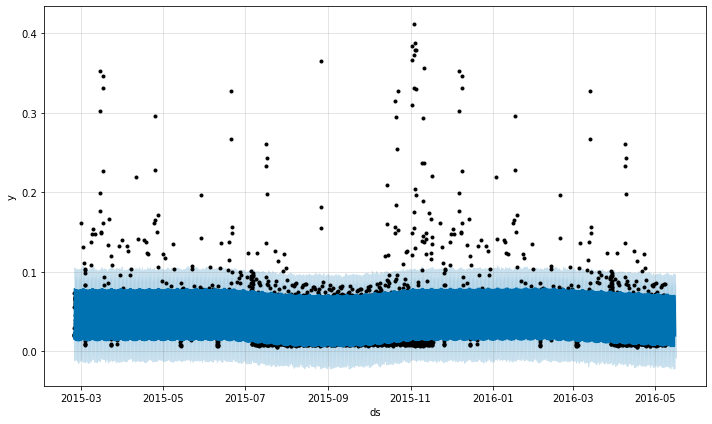

In [ ]:
fig = m.plot(forecast_first_road)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_first_road)

In [ ]:
plot_components_plotly(m, forecast_first_road)

In [ ]:
forecast_first_road.to_csv('forecast_first_road.csv')

In [ ]:
# cross_validation(model, initial, period, horizon)
# intitial: kích thước tập train, mặc định = 3 lần horizon
# horizon: khoảng thời gian quan tâm
# period: khoảng cách giữa các cutoff, mặc định = 1/2 horizon(ở đây period = 84 hours)
# Lần lặp đầu tiên: Train : 0-7999, dự đoán 8000-8000+horizon-1(8167)
# Lần lặp thứ 2: Train: 84-7999+84, dự đoán 8083-8271
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '8000 hours', horizon='168 hours')

INFO:prophet:Making 29 forecasts with cutoffs between 2016-01-24 23:00:00 and 2016-05-01 23:00:00


In [ ]:
df_cv

ds      yhat  ...         y              cutoff
0    2016-01-25 00:00:00  0.023684  ...  0.021817 2016-01-24 23:00:00
1    2016-01-25 01:00:00  0.018418  ...  0.023200 2016-01-24 23:00:00
2    2016-01-25 02:00:00  0.014646  ...  0.021450 2016-01-24 23:00:00
3    2016-01-25 03:00:00  0.018335  ...  0.024000 2016-01-24 23:00:00
4    2016-01-25 04:00:00  0.032428  ...  0.029850 2016-01-24 23:00:00
...                  ...       ...  ...       ...                 ...
4867 2016-05-08 19:00:00  0.045370  ...  0.038100 2016-05-01 23:00:00
4868 2016-05-08 20:00:00  0.035812  ...  0.033550 2016-05-01 23:00:00
4869 2016-05-08 21:00:00  0.027773  ...  0.027783 2016-05-01 23:00:00
4870 2016-05-08 22:00:00  0.023235  ...  0.019467 2016-05-01 23:00:00
4871 2016-05-08 23:00:00  0.020785  ...  0.014167 2016-05-01 23:00:00

[4872 rows x 6 columns]

In [ ]:
from prophet.diagnostics import performance_metrics
df_p_first_road = performance_metrics(df_cv, rolling_window=0.)
df_p_first_road.tail()
# coverage: mức độ phù hợp của các ước tính yhat_upper và yhat_lower

horizon       mse      rmse  ...     mdape     smape  coverage
163 6 days 20:00:00  0.000842  0.029025  ...  0.190806  0.391883  0.655172
164 6 days 21:00:00  0.000527  0.022959  ...  0.182646  0.285251  0.655172
165 6 days 22:00:00  0.000166  0.012881  ...  0.142387  0.189056  0.896552
166 6 days 23:00:00  0.000029  0.005367  ...  0.066875  0.103424  1.000000
167 7 days 00:00:00  0.000034  0.005866  ...  0.073899  0.161209  1.000000

[5 rows x 8 columns]

In [ ]:
df_p_first_road

horizon       mse      rmse  ...     mdape     smape  coverage
0   0 days 01:00:00  0.000027  0.005155  ...  0.043133  0.161084  1.000000
1   0 days 02:00:00  0.000020  0.004502  ...  0.112405  0.175574  1.000000
2   0 days 03:00:00  0.000026  0.005053  ...  0.120362  0.197307  1.000000
3   0 days 04:00:00  0.000025  0.004972  ...  0.172209  0.179172  1.000000
4   0 days 05:00:00  0.000036  0.006029  ...  0.080444  0.129227  1.000000
..              ...       ...       ...  ...       ...       ...       ...
163 6 days 20:00:00  0.000842  0.029025  ...  0.190806  0.391883  0.655172
164 6 days 21:00:00  0.000527  0.022959  ...  0.182646  0.285251  0.655172
165 6 days 22:00:00  0.000166  0.012881  ...  0.142387  0.189056  0.896552
166 6 days 23:00:00  0.000029  0.005367  ...  0.066875  0.103424  1.000000
167 7 days 00:00:00  0.000034  0.005866  ...  0.073899  0.161209  1.000000

[168 rows x 8 columns]

In [ ]:
df_p_first_road.to_csv('df_p_first_road.csv')

# Prophet logistic - forecasting for first road

In [ ]:
maxVal = dataframe_first_road .max()
print(maxVal)

ds    2016-05-08 23:00:00
y                 0.41205
dtype: object


In [ ]:
dataframe_first_road['cap'] = 1

In [ ]:
model_logistic = Prophet(growth='logistic')
model_logistic.fit(dataframe_first_road)
future = model_logistic.make_future_dataframe(periods=168, freq='H')
future['cap'] = 1
forecast_first_road = model_logistic.predict(future)
forecast_first_road[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
10723 2016-05-15 19:00:00  0.046546    0.020269    0.071979
10724 2016-05-15 20:00:00  0.036993    0.009168    0.063078
10725 2016-05-15 21:00:00  0.028970    0.003160    0.054711
10726 2016-05-15 22:00:00  0.024434   -0.002517    0.048668
10727 2016-05-15 23:00:00  0.021960   -0.004722    0.047791

In [ ]:
from prophet.diagnostics import cross_validation
df_cv_logistic = cross_validation(model_logistic, horizon='168 hours')

INFO:prophet:Making 118 forecasts with cutoffs between 2015-03-19 11:00:00 and 2016-05-01 23:00:00


In [ ]:
df_cv_logistic.head()

ds      yhat  ...         y              cutoff
0 2015-03-19 12:00:00  0.071631  ...  0.073500 2015-03-19 11:00:00
1 2015-03-19 13:00:00  0.074343  ...  0.069850 2015-03-19 11:00:00
2 2015-03-19 14:00:00  0.074408  ...  0.066050 2015-03-19 11:00:00
3 2015-03-19 15:00:00  0.072570  ...  0.063733 2015-03-19 11:00:00
4 2015-03-19 16:00:00  0.070997  ...  0.062150 2015-03-19 11:00:00

[5 rows x 6 columns]

In [ ]:
from prophet.diagnostics import performance_metrics
df_p_first_road_logistic = performance_metrics(df_cv_logistic)
df_p_first_road_logistic.tail()

horizon       mse      rmse  ...     mdape     smape  coverage
147 6 days 20:00:00  0.000389  0.019716  ...  0.112536  0.212656  0.922805
148 6 days 21:00:00  0.000487  0.022078  ...  0.113825  0.214783  0.913724
149 6 days 22:00:00  0.000494  0.022232  ...  0.114136  0.211555  0.912535
150 6 days 23:00:00  0.000482  0.021955  ...  0.113923  0.207627  0.921044
151 7 days 00:00:00  0.000437  0.020903  ...  0.114454  0.203005  0.935752

[5 rows x 8 columns]

# Quickstart


In [ ]:
# bash
# Install pystan with pip before using pip to install prophet
!pip install pystan==2.19.1.1
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [ ]:
m = Prophet()
m.fit(df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.200924    7.467305    8.960257
3266 2017-01-16  8.525932    7.797265    9.222699
3267 2017-01-17  8.313330    7.586832    9.048138
3268 2017-01-18  8.145923    7.438231    8.858215
3269 2017-01-19  8.157831    7.407290    8.864935

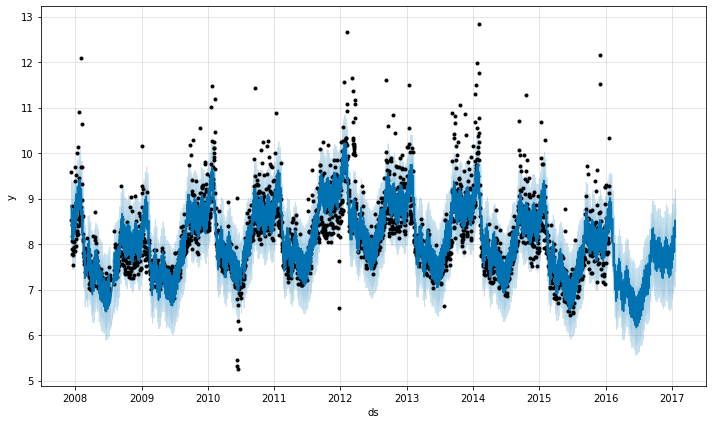

In [ ]:
fig1 = m.plot(forecast)

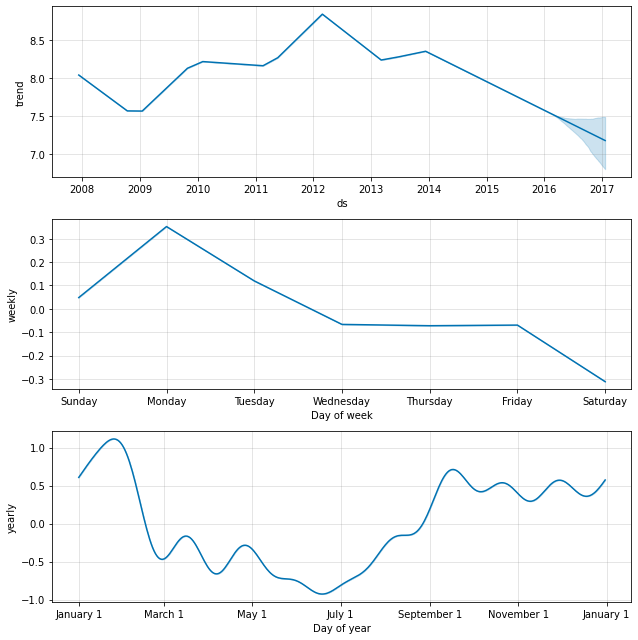

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)


# Fifa dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# bash
# Install pystan with pip before using pip to install prophet
!pip install pystan==2.19.1.1
!pip install prophet

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/minute.csv')
df.head()

minute               period  count
0  1998-04-30 21 30  1998-04-30 21:30:53      1
1  1998-04-30 21 31  1998-04-30 21:31:52      2
2  1998-04-30 21 32  1998-04-30 21:32:59      5
3  1998-04-30 21 33  1998-04-30 21:33:45      1
4  1998-04-30 21 34  1998-04-30 21:34:24      1

In [ ]:
ds = df['period'].apply(lambda  x: x.replace(x[-2:], "00"))

In [ ]:
ds

0         1998-04-30 21:30:00
1         1998-04-30 21:31:00
2         1998-04-30 21:32:00
3         1998-04-30 21:33:00
4         1998-04-30 21:34:00
                 ...         
125295    1998-07-26 21:55:00
125296    1998-07-26 21:56:00
125297    1998-07-26 21:57:00
125298    1998-07-26 21:58:00
125299    1998-07-26 21:59:00
Name: period, Length: 125300, dtype: object

In [ ]:
# tạo cột thời gian cho time series
# '2015-02-24': thời gian bắt đầu
# period: số lần lặp lại vói đơn vị freq
# ds = pd.date_range('1998-04-30 21:30:00',  periods=125300, freq='min')

In [ ]:
# df.rename(columns={'period':'ds'}, inplace=True)

In [ ]:
dataframe_fifa = pd.DataFrame({'ds': ds, 'y': df['count']})

In [ ]:
dataframe_fifa

ds   y
0       1998-04-30 21:30:00   1
1       1998-04-30 21:31:00   2
2       1998-04-30 21:32:00   5
3       1998-04-30 21:33:00   1
4       1998-04-30 21:34:00   1
...                     ...  ..
125295  1998-07-26 21:55:00  28
125296  1998-07-26 21:56:00  21
125297  1998-07-26 21:57:00  24
125298  1998-07-26 21:58:00  22
125299  1998-07-26 21:59:00  25

[125300 rows x 2 columns]

In [ ]:
dataframe_fifa[dataframe_fifa['ds'].str.contains('1998-05-00 06:') == True]

ds  y
23565  1998-05-00 06:00:00  1

In [ ]:
dataframe_fifa[23560:23570]

ds  y
23560  1998-05-17 06:12:00  1
23561  1998-05-17 06:13:00  1
23562  1998-05-17 06:14:00  4
23563  1998-05-17 06:15:00  2
23564  1998-05-17 06:16:00  1
23565  1998-05-00 06:00:00  1
23566  1998-05-17 06:18:00  1
23567  1998-05-17 06:21:00  1
23568  1998-05-17 06:22:00  2
23569  1998-05-17 06:23:00  1

In [ ]:
ds[23565] = '1998-05-17 06:17:00'

In [ ]:
dataframe_fifa[dataframe_fifa['ds'].str.contains('98-05-18 10:03:00') == True]

ds  y
25224  0098-05-18 10:03:00  1

In [ ]:
dataframe_fifa[25220:25230]

ds    y
25220  1998-05-18 09:59:00  129
25221  1998-05-18 10:00:00    4
25222  1998-05-18 10:01:00    2
25223  1998-05-18 10:02:00    4
25224  0098-05-18 10:03:00    1
25225  1998-05-18 10:04:00    4
25226  1998-05-18 10:05:00   41
25227  1998-05-18 10:06:00   37
25228  1998-05-18 10:07:00    2
25229  1998-05-18 10:08:00    1

In [ ]:
ds[25224] = '1998-05-18 10:03:00'

In [ ]:
dataframe_fifa[dataframe_fifa['ds'].str.contains('98-05-18 14:17:00') == True]

ds   y
25477  0098-05-18 14:17:00  52

In [ ]:
dataframe_fifa[25475:25480]

ds    y
25475  1998-05-18 14:15:00  126
25476  1998-05-18 14:16:00  217
25477  0098-05-18 14:17:00   52
25478  1998-05-18 14:18:00    1
25479  1998-05-18 14:19:00    4

In [ ]:
ds[25477] = '	1998-05-18 14:17:00'

In [ ]:
dataframe_fifa.to_csv('fifa_dataset_minute.csv')

In [ ]:
m = Prophet()
m.fit(dataframe_fifa)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# thêm vào cột ds những khoảng thời gian muốn dự báo
future = m.make_future_dataframe(periods=60*24, freq='min')
future.tail()

ds
124668 1998-07-27 21:55:00
124669 1998-07-27 21:56:00
124670 1998-07-27 21:57:00
124671 1998-07-27 21:58:00
124672 1998-07-27 21:59:00

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
124668 1998-07-27 21:55:00  78.772052 -252.062767  390.030440
124669 1998-07-27 21:56:00  77.562157 -255.490307  395.028997
124670 1998-07-27 21:57:00  76.344465 -264.786329  399.261070
124671 1998-07-27 21:58:00  75.119156 -260.694354  397.426840
124672 1998-07-27 21:59:00  73.886408 -277.626572  397.401522

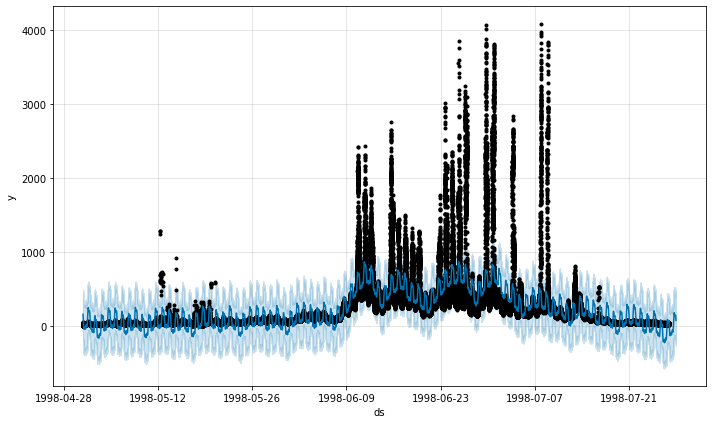

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '100000 minutes', horizon='1440 minutes')

INFO:prophet:Making 34 forecasts with cutoffs between 1998-07-09 09:59:00 and 1998-07-25 21:59:00


In [ ]:
from prophet.diagnostics import performance_metrics
df_p_first_road = performance_metrics(df_cv, rolling_window=0.)
df_p_first_road.tail()